In [850]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import gensim
import re
import tensorflow as tf
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [851]:
train=pd.read_csv(r'/content/drive/MyDrive/train (1).csv')

In [852]:
train.shape

(770, 2)

In [853]:
train.isnull().sum()

Tweets    171
label     171
dtype: int64

In [854]:
train=train.dropna()

In [855]:
train.head()

,Tweets,label
0,Asked #ChatGPT about what it thinks are the pr...,Positive
1,#ChatGPT tornado has already traveled around t...,Neutral
2,This is a great explanation of why #EVs are mo...,Positive
3,‘if you need to write a box-ticking social med...,Positive
4,Just saw an AI tool making my coffee for me. \...,Positive


In [856]:
train.label.value_counts()

Positive    378
Negative    143
Neutral      78
Name: label, dtype: int64

<Axes: ylabel='label'>

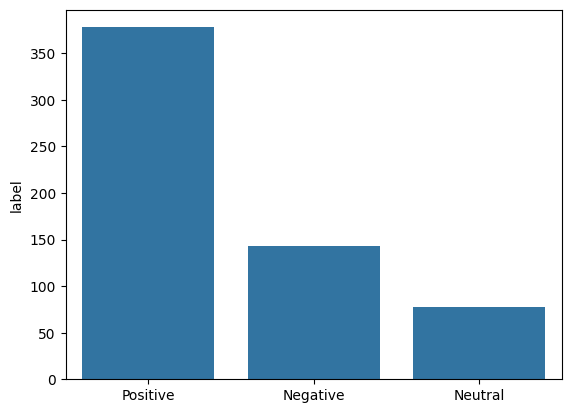

In [857]:
mx=train.label.value_counts()
sns.barplot(mx)

In [858]:
train['Tweets'][4]

'Just saw an AI tool making my coffee for me. \n#ChatGPT #AI #AIMagic'

In [859]:
train['Tweets'][27]

'I love this about #ChatGPT - makes me chuckle every time. Manners cost nothing, people! 😂 https://t.co/vrKNvGRF8J'

In [860]:
train_pos=train[train['label']=='Positive']
train_neg=train[train['label']=='Negative']
train_neu=train[train['label']=='Neutral']

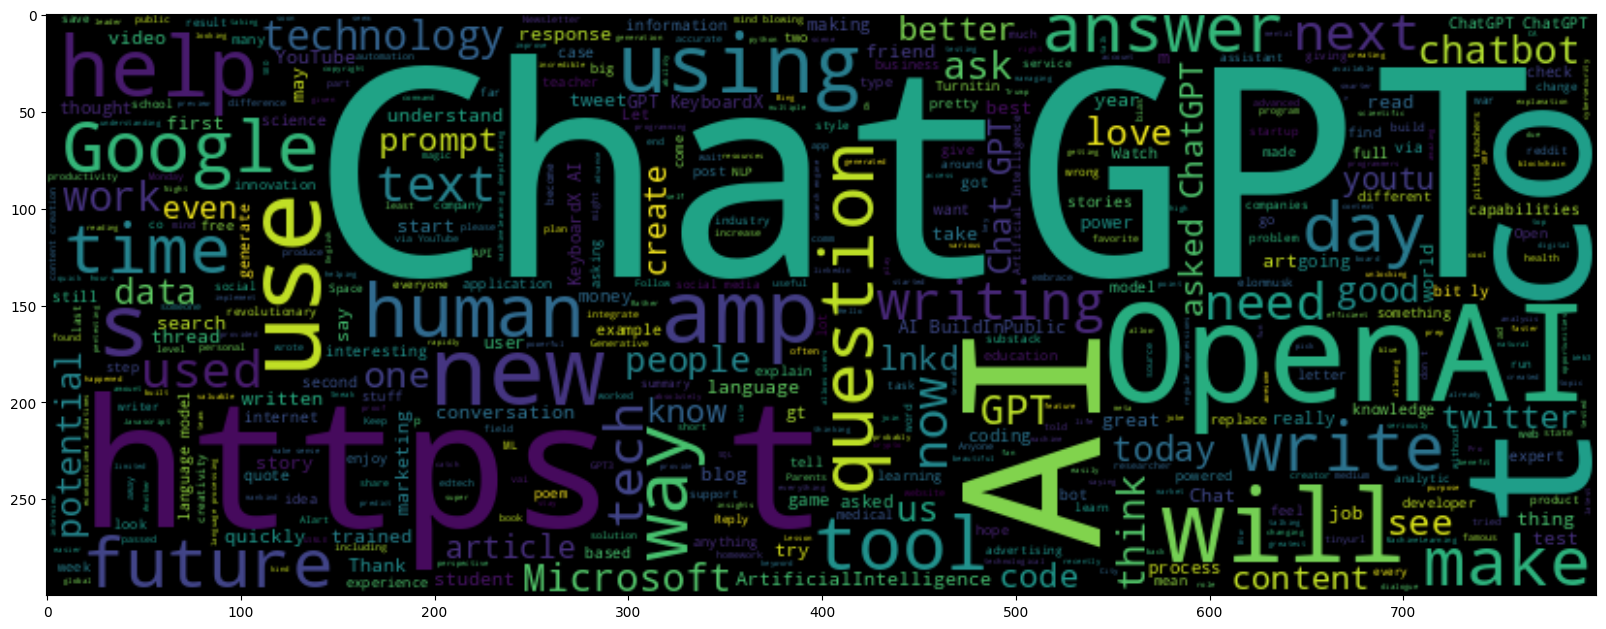

In [861]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500, width=800, height=300).generate(" ".join(train_pos.Tweets))
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [862]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
train['Tweets']=train['Tweets'].apply(lambda x: remove_emoji(x))


In [863]:
train['Tweets'][27]

'I love this about #ChatGPT - makes me chuckle every time. Manners cost nothing, people!  https://t.co/vrKNvGRF8J'

In [864]:
stop=stopwords.words('english')
lemmatizer=WordNetLemmatizer()

In [865]:
def text_to_words(raw_text):
  url=re.compile(r'https?://\S+|www\.\S+')
  url=url.sub(r' ', raw_text)
  text=BeautifulSoup(url,'html.parser').get_text()
  letters_only=re.sub('[^a-zA-Z]',' ',text)
  words=letters_only.lower().split()
  no_stopwords=[w for w in words if not w in stop]
  lemmatize_word=[lemmatizer.lemmatize(w) for w in no_stopwords]
  return ' '.join(lemmatize_word)





In [866]:
train['tweet_clean']=train['Tweets'].apply(text_to_words)

<ipython-input-865-fc3ea9c7b49d>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text=BeautifulSoup(url,'html.parser').get_text()


In [867]:
encoder=LabelEncoder()

In [868]:
train['label']=encoder.fit_transform(train['label'])

In [869]:
train.head()

,Tweets,label,tweet_clean
0,Asked #ChatGPT about what it thinks are the pr...,2,asked chatgpt think problem associated urbanis...
1,#ChatGPT tornado has already traveled around t...,1,chatgpt tornado already traveled around world ...
2,This is a great explanation of why #EVs are mo...,2,great explanation ev efficient energy source c...
3,‘if you need to write a box-ticking social med...,2,need write box ticking social medium post usin...
4,Just saw an AI tool making my coffee for me. \...,2,saw ai tool making coffee chatgpt ai aimagic


In [870]:
X=train['tweet_clean']
y=train['label']

In [871]:
train.label.value_counts()

2    378
0    143
1     78
Name: label, dtype: int64

In [872]:
embedding_dict={}
with open('/content/drive/MyDrive/sem 2/NLP/glove.6B.100d.txt','r') as f:
  for line in f:
    values=line.split()
    word=values[0]
    vectors=np.array(values[1:],'float32')
    embedding_dict[word]=vectors

f.close()


In [873]:
X_train, X_test, y_train, y_test=train_test_split(X,y,stratify=y, test_size=0.2, random_state=42)


In [874]:
maxlen=50
tokenise=Tokenizer()
tokenise.fit_on_texts(X_train)
X_train=tokenise.texts_to_sequences(X_train)
X_test=tokenise.texts_to_sequences(X_test)
X_train=tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test=tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=maxlen)

In [875]:
X_train

array([[ 581,  582, 1054, ...,    0,    0,    0],
       [   1,  404, 1055, ...,    0,    0,    0],
       [ 405,    1,  406, ...,    0,    0,    0],
       ...,
       [2886,  539,    2, ...,    0,    0,    0],
       [ 203,    1,   21, ...,    0,    0,    0],
       [   1,  684, 1046, ...,    0,    0,    0]], dtype=int32)

In [876]:
X_test

array([[ 400,   25,   17, ...,    0,    0,    0],
       [1736,  246, 1468, ...,    0,    0,    0],
       [  24,    6,   11, ...,    0,    0,    0],
       ...,
       [  76,    1,    3, ...,    0,    0,    0],
       [  17,    1,  450, ...,    0,    0,    0],
       [  20,   24,    6, ...,    0,    0,    0]], dtype=int32)

In [877]:
y_train

70     2
31     0
254    1
515    1
573    0
      ..
461    0
87     0
51     1
431    1
147    0
Name: label, Length: 479, dtype: int64

In [878]:
y_test

116    1
53     1
524    2
540    2
351    2
      ..
569    0
17     2
109    0
249    2
370    2
Name: label, Length: 120, dtype: int64

In [879]:
word_index=tokenise.word_index
print("no of unique words", len(word_index))

no of unique words 2887


In [880]:
from tqdm import tqdm

In [881]:
num_words=len(word_index)+1
embedding_matrix =np.zeros((num_words, maxlen))
for word, i in tqdm(word_index.items()):
  if i > num_words:
    continue
    embedding_vectors=embedding_dict.get(word)
    if embedding_vectos is not  None:
       embedding_matrix[i]=embedding_vectors

100%|██████████| 2887/2887 [00:00<00:00, 947789.26it/s]


In [882]:
print(embedding_matrix[:3])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


In [883]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=num_words, output_dim=maxlen, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(tf.keras.layers.LSTM(maxlen))
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [884]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='min',patience=20)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [885]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16 ,validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/50
27/27 [==============================] - 4s 64ms/step - loss: 1.0915 - accuracy: 0.6172 - val_loss: 1.0914 - val_accuracy: 0.5000
Epoch 2/50
27/27 [==============================] - 1s 26ms/step - loss: 1.0771 - accuracy: 0.6450 - val_loss: 1.0846 - val_accuracy: 0.5000
Epoch 3/50
27/27 [==============================] - 1s 22ms/step - loss: 1.0635 - accuracy: 0.6450 - val_loss: 1.0786 - val_accuracy: 0.5000
Epoch 4/50
27/27 [==============================] - 1s 23ms/step - loss: 1.0506 - accuracy: 0.6450 - val_loss: 1.0731 - val_accuracy: 0.5000
Epoch 5/50
27/27 [==============================] - 1s 22ms/step - loss: 1.0384 - accuracy: 0.6450 - val_loss: 1.0681 - val_accuracy: 0.5000
Epoch 6/50
27/27 [==============================] - 1s 21ms/step - loss: 1.0268 - accuracy: 0.6450 - val_loss: 1.0638 - val_accuracy: 0.5000
Epoch 7/50
27/27 [==============================] - 1s 23ms/step - loss: 1.0162 - accuracy: 0.6450 - val_loss: 1.0598 - val_accuracy: 0.5000
Epoch 8/50
27

In [886]:
# early_stop=tf.keras.callbacks.EarlyStopping(monitor='accuracy',mode='min', patience=10)

In [887]:
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy']
# )

In [888]:
# history =model.fit(X_train ,y_train,epochs=50,callbacks=[early_stop],validation_split=0.2)

In [889]:
pred=model.predict(X_test)

4/4 [==============================] - 1s 13ms/step


In [890]:
preds=[]
for i in pred:
  preds.append(np.argmax(i))


In [891]:
preds

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [892]:
accuracy = accuracy_score(y_test, preds)
print(f'Train Accuracy: {accuracy*100:.2f}%')

Train Accuracy: 63.33%


In [893]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.00      0.00      0.00        15
           2       0.63      1.00      0.78        76

    accuracy                           0.63       120
   macro avg       0.21      0.33      0.26       120
weighted avg       0.40      0.63      0.49       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [894]:
testdata=pd.read_csv(r'/content/drive/MyDrive/test.csv', names=['Tweets', 'label'])

In [895]:
testdata.isnull().sum()

Tweets    0
label     0
dtype: int64

In [896]:
testdata.label.value_counts()

Positive    115
Negative     37
Neutral      19
Name: label, dtype: int64

In [897]:
testdata.label=encoder.fit_transform(testdata.label)

In [898]:
testdata.head()

,Tweets,label
0,@CoffeeVectors @jenny____r confirmed #ChatGPT ...,2
1,Sooooo depressing (our competition as journos ...,0
2,I just had a 4 hour deep conversation with #Ch...,2
3,I began to explore #chatgpt today.\n\nI asked ...,0
4,/2023\n1. Ask #ChatGPT\n2. Add some content\n3...,2


In [899]:
testdata['tweet_clean']=testdata['Tweets'].apply(text_to_words)

<ipython-input-865-fc3ea9c7b49d>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text=BeautifulSoup(url,'html.parser').get_text()


In [900]:
testdata

,Tweets,label,tweet_clean
0,@CoffeeVectors @jenny____r confirmed #ChatGPT ...,2,coffeevectors jenny r confirmed chatgpt dad joke
1,Sooooo depressing (our competition as journos ...,0,sooooo depressing competition journos writer s...
2,I just had a 4 hour deep conversation with #Ch...,2,hour deep conversation chatgpt future wild kno...
3,I began to explore #chatgpt today.\n\nI asked ...,0,began explore chatgpt today asked bio found ma...
4,/2023\n1. Ask #ChatGPT\n2. Add some content\n3...,2,ask chatgpt add content publish
...,...,...,...
166,Earth's #OpenAIChatGPT has become sentient an...,2,earth openaichatgpt become sentient contacted ...
167,The first response was elaborate with some obv...,2,first response elaborate obvious name spy vym ...
168,The absolutely terrifying inevitability of #Ch...,0,absolutely terrifying inevitability chatgpt lu...
169,I asked ChatGPT what video would give the most...,1,asked chatgpt video would give realistic view ...


In [901]:
test = tokenise.texts_to_sequences(testdata)
padded_test = tf.keras.preprocessing.sequence.pad_sequences(test, maxlen=maxlen,padding='post')

In [902]:
predictions = model.predict(padded_test)

1/1 [==============================] - 0s 23ms/step


In [903]:
predictions

array([[0.26481798, 0.21938495, 0.515797  ],
       [0.26481798, 0.21938495, 0.515797  ],
       [0.26481798, 0.21938495, 0.515797  ]], dtype=float32)

In [904]:
testdata.label



0      2
1      0
2      2
3      0
4      2
      ..
166    2
167    2
168    0
169    1
170    1
Name: label, Length: 171, dtype: int64

In [905]:
test_preds=[]
for row in predictions:
    pred = np.argmax(row)
    test_preds.append(pred)

In [906]:
test_preds

[2, 2, 2]

In [907]:
predictions

array([[0.26481798, 0.21938495, 0.515797  ],
       [0.26481798, 0.21938495, 0.515797  ],
       [0.26481798, 0.21938495, 0.515797  ]], dtype=float32)

In [908]:
loss_new, accuracy_new = model.evaluate(testdata.label,predictions)
print(f'New Data Accuracy: {accuracy_new * 100:.2f}%')
print(f'New Data Loss: {loss_new:.4f}')

ValueError: Data cardinality is ambiguous:
  x sizes: 171
  y sizes: 3
Make sure all arrays contain the same number of samples.